In [5]:
#Write your code here
print("Hello World!")

Hello World!


### 주피터 노트북 단축키
* 셀 활성화 (enter) / 비활성화 (esc)
* 셀 추가, 삭제 등은 비활성화 상태에서 해야하며, a(위에 추가), b(아래에추가), command+d+d(셀 삭제)/x
* markdown / code 셀 차이점
* code -> markdown 비활성화 상태에서 command + M / markdown -> code command + Y
* 셀 실행 shift + enter

In [6]:

import pandas as pd


In [7]:
pd.__version__

'1.1.1'

## Read Data

In [8]:
movies = pd.read_csv('./data/ml-latest-small/movies.csv', index_col='movieId')

In [9]:
movies.shape

(9742, 2)

In [10]:
# movies.head(10)
# movies.tail(10)
movies.sample(10)

,title,genres
movieId,,
4035,"Claim, The (2000)",Romance|Western
33838,Rize (2005),Documentary
1699,"Butcher Boy, The (1997)",Comedy|Drama
4194,I Know Where I'm Going! (1945),Drama|Romance|War
85881,Win Win (2011),Comedy|Drama
55721,Elite Squad (Tropa de Elite) (2007),Action|Crime|Drama|Thriller
109313,Chouchou (2003),Comedy
57532,Meet the Spartans (2008),Comedy
4292,Norma Rae (1979),Drama


In [11]:
movies.columns

Index(['title', 'genres'], dtype='object')

### 개봉연도 데이터 정제하기 (데이터 전처리, Preprocessing)

In [12]:
movies['year'] = movies['title'].str.extract('(\(\d\d\d\d\))')

In [13]:
movies['year'] = movies['year'].str.extract('(\d\d\d\d)')

In [14]:
# 중복값제거
movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908'], dtype=object)

결측값 핸들링하기

In [15]:
# NaN(Not a Number), 결측치
# movies[movies['year'].isnull()]

In [16]:
movies['year'] = movies['year'].fillna('2050')

### 데이터에 가장 많이 출현하는 개봉연도를 찾아주세요

In [17]:
movies['year'].value_counts()

2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1922      1
1915      1
1908      1
1921      1
1902      1
Name: year, Length: 107, dtype: int64

In [18]:

%matplotlib inline

import seaborn as sns
# seaborn figure의 크기 조절을 위해서
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='year', ylabel='count'>

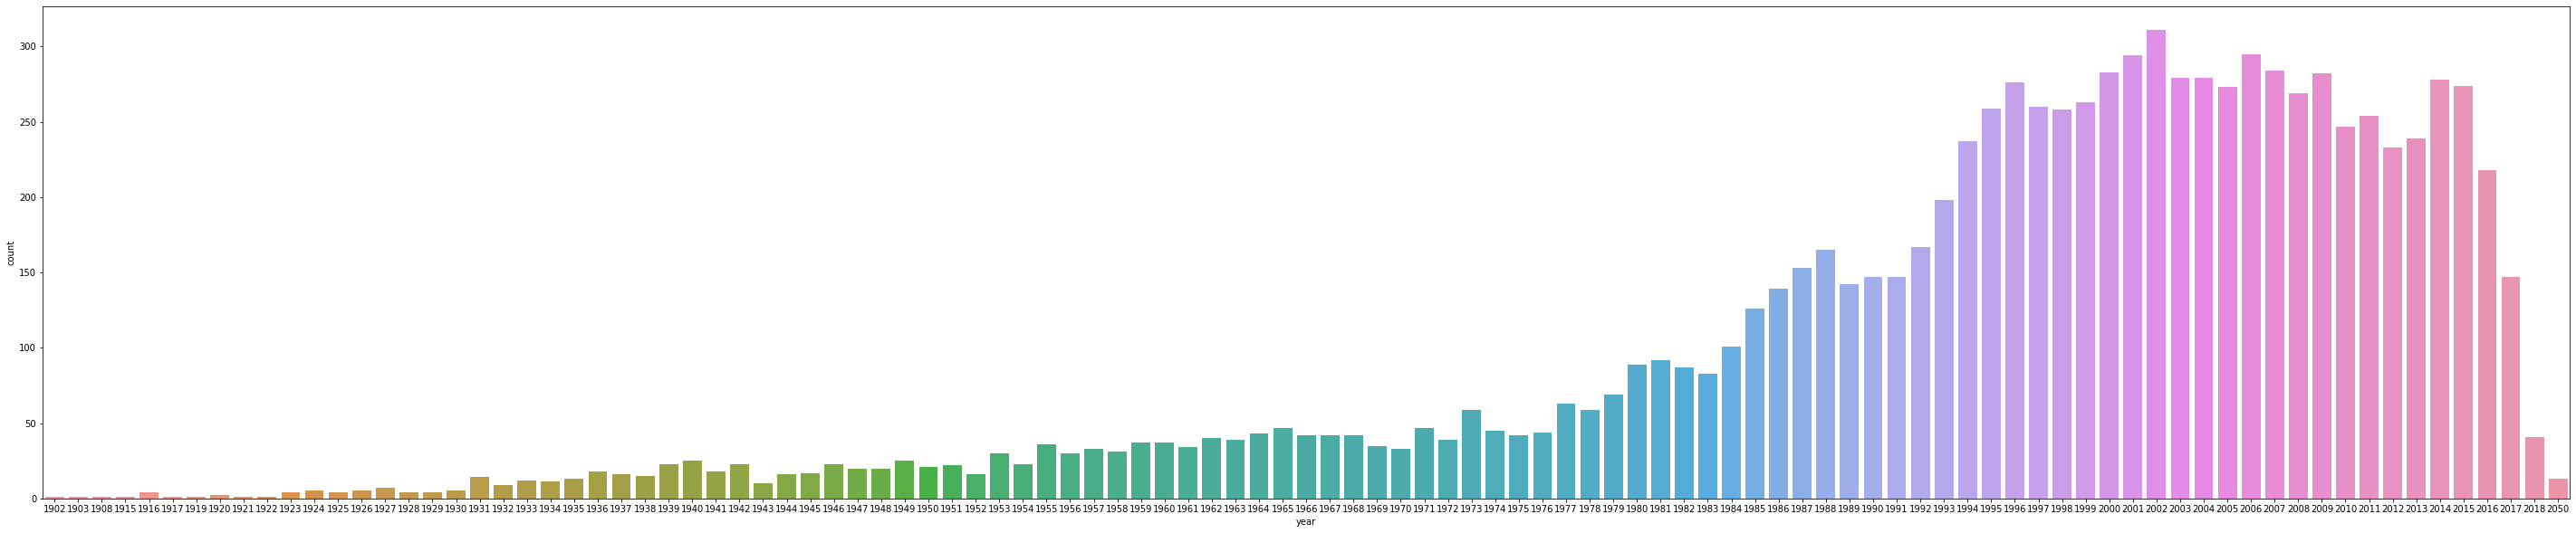

In [19]:
plt.figure(figsize = (50 ,10))
sns.countplot(data=movies, x='year')

### genres 분석

In [20]:
sample_genre = movies['genres'][1]
sample_genre

'Adventure|Animation|Children|Comedy|Fantasy'

In [21]:
sample_genre.split("|")

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [22]:
movies['genres'].apply(lambda x: x.split("|"))

movieId
1         [Adventure, Animation, Children, Comedy, Fantasy]
2                            [Adventure, Children, Fantasy]
3                                         [Comedy, Romance]
4                                  [Comedy, Drama, Romance]
5                                                  [Comedy]
                                ...                        
193581                 [Action, Animation, Comedy, Fantasy]
193583                         [Animation, Comedy, Fantasy]
193585                                              [Drama]
193587                                  [Action, Animation]
193609                                             [Comedy]
Name: genres, Length: 9742, dtype: object

In [23]:
list(movies['genres'].apply(lambda x: x.split("|")))

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Comedy'],
 ['Comedy'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Action', 'Crime', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Children', 'Drama'],
 ['Drama', 'Romance'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Crime', 'Drama'],
 ['Drama'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Children', 'Drama'],
 ['Crime', 'Drama'],
 ['Children', 'Comedy'],
 

In [24]:
genres_list = list(movies['genres'].apply(lambda x: x.split("|")))
genres_list[:3]

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance']]

In [25]:
flat_list = []
for sublist in genres_list:
    for item in sublist:
        flat_list.append(item)

In [26]:
flat_list

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Adventure',
 'Children',
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 'Children',
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Adventure',
 'Animation',
 'Children',
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Crime',
 'Drama',
 'Drama',
 'Romance',
 'Comedy',
 'Comedy',
 'Action',
 'Comedy',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Crime',
 'Thriller',
 'Crime',
 'Drama',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Children',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Drama',
 'Fantasy',
 'Mystery',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'Children',
 'Drama',
 'Crime',
 'Drama',
 'Children',
 'Comedy',
 'Comedy',
 'Romance'

In [27]:
# 중복 제거
set(flat_list)

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [28]:
genres_unique = list(set(flat_list))

In [29]:
len(genres_unique) #no genres 제외하면 19개

20

### 장르 데이터 숫자형으로 변환하기

In [30]:
message = "Hello"
message

'Hello'

In [31]:
'H' in message

True

In [35]:
#sample_genre <- 토이스토리
'Horror' in sample_genre

False

In [38]:
movies['Adventure'] = movies['genres'].apply(lambda x: 'Adventure' in x)

In [41]:
movies['Comedy'] = movies['genres'].apply(lambda x: 'Comedy' in x)

In [42]:
movies

,title,genres,year,Adventure,Comedy
movieId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,True,True
2,Jumanji (1995),Adventure|Children|Fantasy,1995,True,False
3,Grumpier Old Men (1995),Comedy|Romance,1995,False,True
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,False,True
5,Father of the Bride Part II (1995),Comedy,1995,False,True
...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,False,True
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,False,True
193585,Flint (2017),Drama,2017,False,False


In [43]:
movies['genres'].str.get_dummies(sep='|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193583,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [45]:
genres_dummies = movies['genres'].str.get_dummies(sep='|')

In [47]:
# difference between csv and pickle when saving pandas dataframe
genres_dummies.to_pickle('./data/ml-latest-small/genres.p')

In [51]:
# 상관계수 : 0에 가까울 수록 둘간의 상관관계가 없음.
# 두 장르의 관계가 1에 가깝다는 것은 두 장르가 자주 같이 출현
genres_dummies.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


<AxesSubplot:>

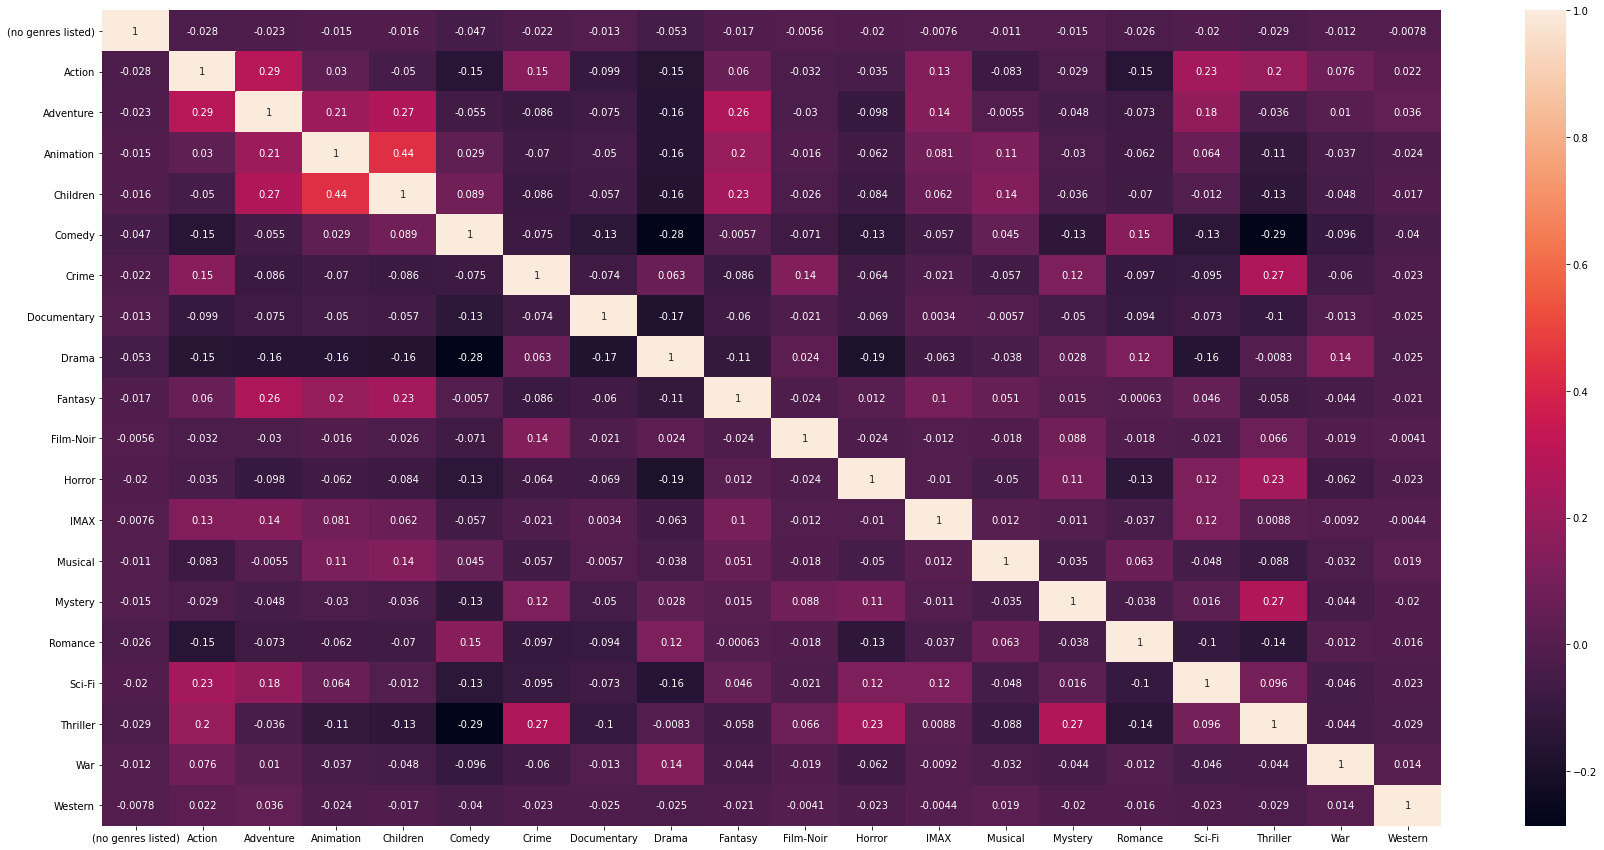

In [53]:
#크기
plt.figure(figsize=(30, 15))
sns.heatmap(genres_dummies.corr(), annot=True)

In [ ]:
pd.read_csv